
## **특징 선택**

(이 파일 이전,'[모델링] 04. Feature Selection(SelectKBest), Ridge Regression.ipynb' 을 우선 확인 부탁드립니다.)



모델링을 진행할 경우, features가 너무 적다면 정확도가 떨어집니다. 분류기준이 명확하지 않기 때문이죠.

그런데, 분류 기준이 너무 많아도 모델 성능이 떨어진다는 사실, 알고 계셨나요?

분류 기준이 과한 경우, 중요한 분류 기준 특징들만을 추출해 모델링을 하는 것이 도움이 될 수 있습니다.

이때의 포인트는, 적당한 Features를 사용해야 한다는 것인데요, 너무 적지 않는 선에서, 모델이 과적합되지 않을 수 있도록 Feature를 선택하는 것이 좋습니다. 이때, 특정 K개의 Features를 선택해 모델링을 진행하여 최적 Feature개수를 추출하는 방법론이 바로 SelectKBest입니다.

오늘은 **SelectKBest를 활용해 Features의 개수를 추출**하여, **Best Logistic Regression 모델**을 구성해보도록 하겠습니다.

---

In [ ]:
# 필요한 Lib Import

import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import f_regression, SelectKBest

In [ ]:
# 데이터셋 Load

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df=pd.read_csv('/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### **전처리 수행**

모델링을 실습해보기 위한 파일이므로, 최소한의 전처리만 수행합니다.

In [ ]:
# 데이터 중 id (필요없는 feature) 제거
df = df.drop(['id'],axis=1)

In [ ]:
# 데이터의 null값 확인
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

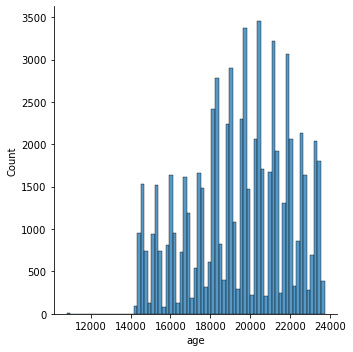

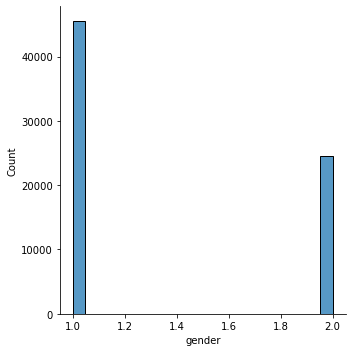

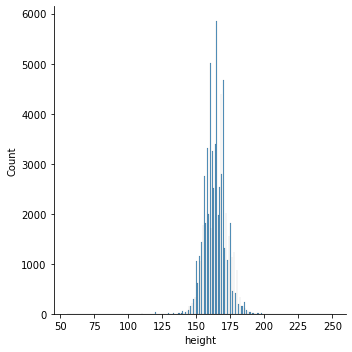

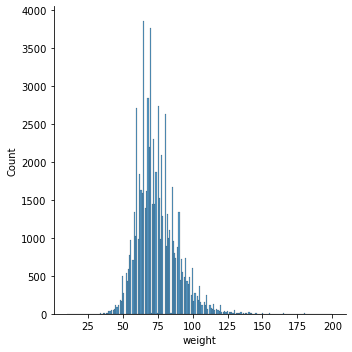

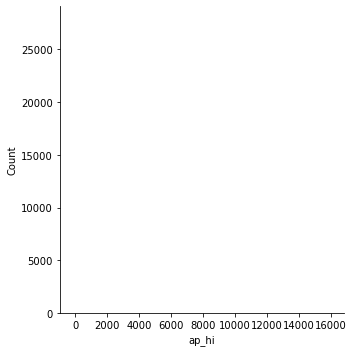

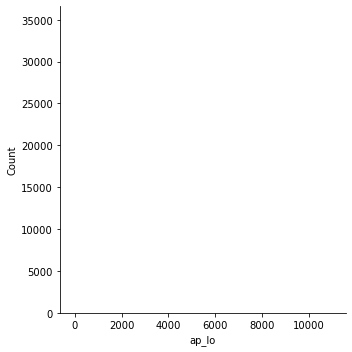

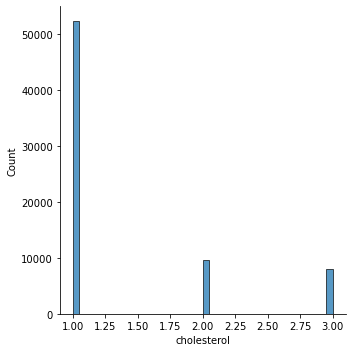

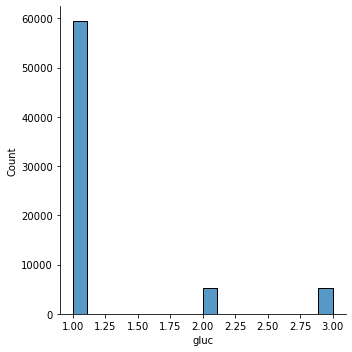

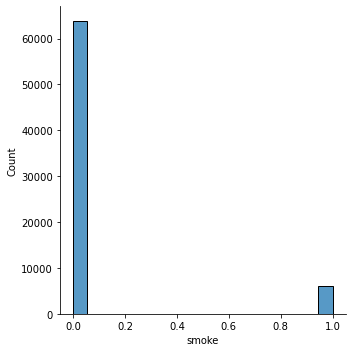

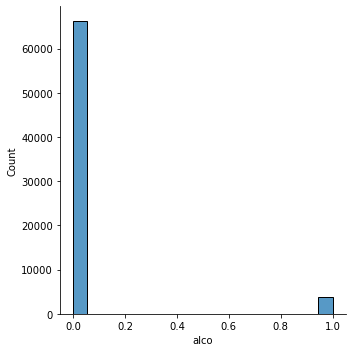

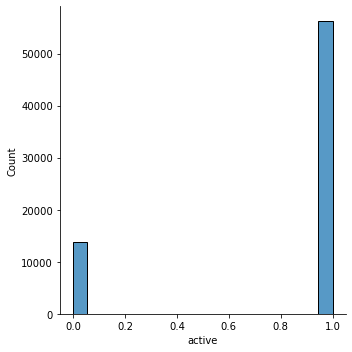

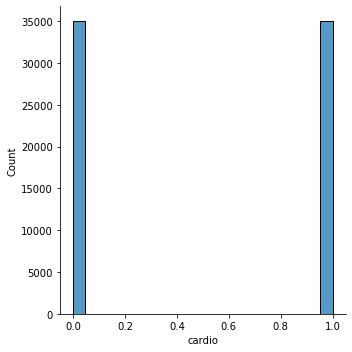

In [ ]:
# 데이터의 이상치를 시각화로 간단하게 확인해봅니다. (강조: 전처리 실습이 아니라, Feature Selection '실습'을 위한 파일이므로, 최소한의 전처리만 수행하는 것이오니 이점 참고부탁드립니다.)

col = df.columns

for i in col:
    print(sns.displot(df[i]))

In [ ]:
# train, val, test 데이터셋 분리합니다.
# 일반적으로 test, val 데이터의 비율은 train데이터의 10%-20% 의 데이터 양을 차지합니다.

train_val, test = train_test_split(df, random_state=111, test_size=0.3)
train, val = train_test_split(df, random_state=111, train_size=0.8)

### **사이킷런의 LogisticRegression을 사용해 모델 생성** 

In [ ]:
#각 테스트, 학습, 평가 모델의 features와 target을 분리

X_train = train.drop(['cardio'],axis=1)
X_val = val.drop(['cardio'],axis=1)
X_test = test.drop(['cardio'],axis=1)

y_train = train['cardio']
y_val = val['cardio']
y_test = test['cardio']

In [ ]:
# 모델 학습

lr = LogisticRegression()
lr.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
# 예측 후 정확도 확인

y_val_pred = lr.predict(X_val)
accuracy_score(y_val,y_val_pred)

0.6988571428571428

### **데이터에서 범주형 성질을 지닌 특성을 찾아 원핫인코딩**

In [ ]:
# 숫자의 차이가 의미없는 것을 원핫 인코딩
# 이는 gender, smoke, alco, active가 있다.

# 데이터타입 변경
df['gender'] = df['gender'].astype('category')
df['smoke'] = df['smoke'].astype('category')
df['alco'] = df['alco'].astype('category')
df['active'] = df['active'].astype('category')

# 원핫 인코딩
encoder = OneHotEncoder(use_cat_names = True)
df = encoder.fit_transform(df)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
# 원핫 인코딩한 df 데이터셋으로 새로운 train, test 데이터를 제작

train_val, test = train_test_split(df, random_state=111, test_size=0.3)
train, val = train_test_split(df, random_state=111, train_size=0.8)

X_train = train.drop(['cardio'],axis=1)
X_val = val.drop(['cardio'],axis=1)
X_test = test.drop(['cardio'],axis=1)

y_train = train['cardio']
y_val = val['cardio']
y_test = test['cardio']

### **feature scaling 을 진행**

In [ ]:
# Feature Scaling 별 MAE(선형회귀 평가지표 중 하나)값을 살펴보고, 최적의 MAE값이 도출되는 Columns를 확인합니다.

for i in range(1,len(X_train.columns)):
    selector = SelectKBest(score_func=f_regression, k=i)
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_val_sel = selector.transform(X_val)
    lr.fit(X_train_sel, y_train)
    pred = lr.predict(X_val_sel)
    mae = mean_absolute_error(y_val, pred)
    print('{}개일 때 mae: '.format(i),round(mae,2),'\n',X_train.columns[selector.get_support()])

1개일 때 mae:  0.5 
 Index(['age'], dtype='object')
2개일 때 mae:  0.5 
 Index(['age', 'cholesterol'], dtype='object')
3개일 때 mae:  0.36 
 Index(['age', 'weight', 'cholesterol'], dtype='object')
4개일 때 mae:  0.44 
 Index(['age', 'weight', 'cholesterol', 'gluc'], dtype='object')


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


5개일 때 mae:  0.4 
 Index(['age', 'weight', 'ap_lo', 'cholesterol', 'gluc'], dtype='object')
6개일 때 mae:  0.45 
 Index(['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc'], dtype='object')
7개일 때 mae:  0.45 
 Index(['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'active_1.0'], dtype='object')
8개일 때 mae:  0.45 
 Index(['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'active_1.0',
       'active_0.0'],
      dtype='object')
9개일 때 mae:  0.45 
 Index(['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke_1.0',
       'active_1.0', 'active_0.0'],
      dtype='object')
10개일 때 mae:  0.39 
 Index(['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke_0.0',
       'smoke_1.0', 'active_1.0', 'active_0.0'],
      dtype='object')
11개일 때 mae:  0.39 
 Index(['age', 'gender_1.0', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke_0.0', 'smoke_1.0', 'active_1.0', 'active_0.0'],
      dtype='object')
12개일 때 mae:  0.39 
 Index(['age', 'gender_2.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


13개일 때 mae:  0.3 
 Index(['age', 'gender_2.0', 'gender_1.0', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke_0.0', 'smoke_1.0', 'active_1.0',
       'active_0.0'],
      dtype='object')
14개일 때 mae:  0.31 
 Index(['age', 'gender_2.0', 'gender_1.0', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke_0.0', 'smoke_1.0', 'alco_0.0',
       'active_1.0', 'active_0.0'],
      dtype='object')


In [ ]:
# 13개일 때 mae가 가장 작으므로, feature는 13개로 진행합니다.
# 이 때의 columns값이 무엇인지 확인하여, 해당 features로 데이터셋을 생성합니다.

df[['age', 'gender_2.0', 'gender_1.0', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
    'gluc', 'smoke_0.0', 'smoke_1.0', 'active_1.0','active_0.0']]

,age,gender_2.0,gender_1.0,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke_0.0,smoke_1.0,active_1.0,active_0.0
0,18393,1,0,168,62.0,110,80,1,1,1,0,1,0
1,20228,0,1,156,85.0,140,90,3,1,1,0,1,0
2,18857,0,1,165,64.0,130,70,3,1,1,0,0,1
3,17623,1,0,169,82.0,150,100,1,1,1,0,1,0
4,17474,0,1,156,56.0,100,60,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,1,0,168,76.0,120,80,1,1,0,1,1,0
69996,22601,0,1,158,126.0,140,90,2,2,1,0,1,0
69997,19066,1,0,183,105.0,180,90,3,1,1,0,0,1
69998,22431,0,1,163,72.0,135,80,1,2,1,0,0,1


### **검증세트에서 정확도 확인**


In [ ]:
select_features = ['age', 'gender_2.0', 'gender_1.0', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
    'gluc', 'smoke_0.0', 'smoke_1.0', 'active_1.0','active_0.0']

X_train = X_train[select_features]
X_test = X_test[select_features]
X_val = X_val[select_features]

In [ ]:
# 모델학습 및 예측, 정확도 확인

lr.fit(X_train,y_train)
pred = lr.predict(X_val)

print("training accuracy: ", accuracy_score(y_val, pred))

training accuracy:  0.7002857142857143


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
